In [1]:
import pickle
from glob import glob
import os.path as op
import pandas as pd

from functools import reduce
from operator import getitem

import matplotlib.pyplot as plt

In [2]:
xcpd_path = '/pscratch/sd/m/mphagen/hcp-functional-connectivity/derivatives/connectivity-matrices/xcpd/lassoBIC_blocks'
xcpd_pkls = glob(op.join(op.join(xcpd_path, 'sub-*', '*.pkl')))[:100]  

In [3]:
file = xcpd_pkls[1]

In [31]:
sub_list = [] 

In [32]:
for file in xcpd_pkls: 
    sub_list.append(op.basename(file).split('_')[0]) 


In [56]:
node_list = [f"node_{ii}" for ii in range(0,100)] 

In [57]:
fold_list = [f"fold_{ii}" for ii in range(0,5)] 

In [58]:
iterables = [fold_list, node_list]

In [9]:
def extract_r2(file, r2_df): 
    sub = op.basename(file).split('_')[0]

    with open(file, 'rb') as l:
        result_dict = pickle.load(l)

    for ii in range(0,5): 
        for jj in range(0,100):
            r2_df.loc[(f'fold_{ii}', f'node_{jj}'), sub] = reduce(getitem, 
                                                                  (f'fold_{ii}', f'node_{jj}', 'test_r2'), 
                                                                  result_dict) 
    return r2_df

In [126]:
index = pd.MultiIndex.from_product(iterables, names=["fold", "node"])
temp_df = pd.DataFrame(index=index, columns=sub_list, dtype=float)
r2_df = temp_df
for file in xcpd_pkls: 
    r2_df = extract_r2(file, r2_df) 
    

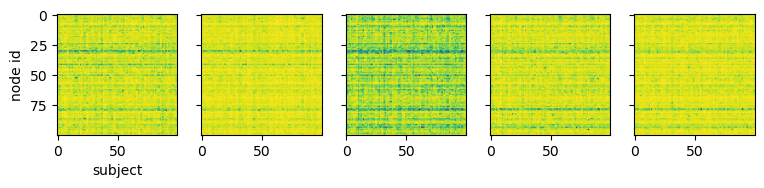

In [168]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(9, 45), sharex=True, sharey=True) 
ax[0].imshow(r2_df.loc['fold_0']) 
ax[0].set_xlabel('subject') 
ax[0].set_ylabel('node id') 
ax[1].imshow(r2_df.loc['fold_1']) 
ax[2].imshow(r2_df.loc['fold_2']) 
ax[3].imshow(r2_df.loc['fold_3']) 
ax[4].imshow(r2_df.loc['fold_4']) 
plt.show() 

In [68]:
import numpy as np

In [95]:
np.mean(r2_df.loc['fold_0'].values.ravel()) 

np.float64(0.6354394070923328)

In [96]:
np.mean(r2_df.loc['fold_1'].values.ravel()) 

np.float64(0.645330096834898)

In [97]:
np.mean(r2_df.loc['fold_2'].values.ravel()) 

np.float64(0.700830497521162)

In [98]:
np.mean(r2_df.loc['fold_3'].values.ravel()) 

np.float64(0.6436499962985516)

In [99]:
np.mean(r2_df.loc['fold_4'].values.ravel()) 

np.float64(0.6268151886165142)

In [118]:
import seaborn as sns

In [125]:
r2_df.loc['fold_1'].head() 

,sub-192136,sub-197550,sub-827052,sub-168341,sub-579867,sub-389357,sub-793465,sub-793465,sub-206929,sub-206929,...,sub-888678,sub-257946,sub-173839,sub-880157,sub-562345,sub-114217,sub-114217,sub-500222,sub-683256,sub-168139
node,,,,,,,,,,,,,,,,,,,,,
node_0,0.643999,0.704356,0.209491,0.395605,0.32665,-0.092396,0.471528,0.471528,0.439041,0.439041,...,0.15545,0.529027,0.452534,0.254919,0.137635,0.492129,0.492129,0.662271,0.539359,0.543916
node_1,0.801417,0.441876,0.647034,0.830482,0.396898,0.750484,0.670467,0.670467,0.680951,0.680951,...,0.888615,0.76492,0.647785,0.766474,0.812034,0.55758,0.55758,0.839697,0.60478,0.851894
node_2,0.838915,0.602551,0.574738,0.796372,0.719629,0.681234,0.867099,0.867099,0.669972,0.669972,...,0.674529,0.810288,0.770415,0.760741,0.815825,0.745175,0.745175,0.873029,0.568404,0.755712
node_3,0.775469,0.629376,0.737423,0.805155,0.424049,0.354163,-0.016082,-0.016082,0.624819,0.624819,...,0.723763,0.583529,0.531388,0.738438,0.675286,0.639978,0.639978,0.529915,0.339002,-0.044534
node_4,0.694887,0.631089,0.751475,0.738659,0.697275,0.87526,0.621492,0.621492,0.513316,0.513316,...,0.834231,0.562562,0.800757,0.899484,0.720163,0.611942,0.611942,0.627428,0.324527,0.7435


In [124]:
np.array(r2_df.loc['fold_1'], dtype=float)

array([[0.64399922, 0.70435607, 0.20949107, ..., 0.66227078, 0.53935933,
        0.54391575],
       [0.80141723, 0.44187611, 0.64703369, ..., 0.83969682, 0.60478032,
        0.8518939 ],
       [0.83891523, 0.60255116, 0.57473838, ..., 0.87302935, 0.56840426,
        0.75571233],
       ...,
       [0.7584821 , 0.87852138, 0.76589334, ..., 0.83951229, 0.83261943,
        0.86088216],
       [0.72231424, 0.70734352, 0.59557599, ..., 0.64031994, 0.79366958,
        0.39117849],
       [0.79483414, 0.80913472, 0.82103556, ..., 0.85635519, 0.72170049,
        0.74504286]], shape=(100, 100))

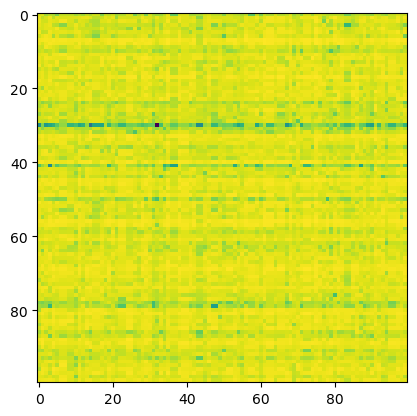

In [121]:
plt.imshow(np.array(r2_df.loc['fold_1'], dtype=float))
plt.show()

TypeError: Image data of dtype object cannot be converted to float

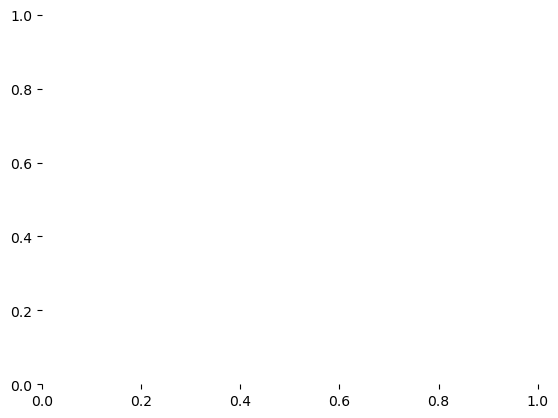

In [119]:
sns.heatmap(r2_df.loc['fold_1'])  